In [1]:
from Bio import SeqIO
from embeddings_config import avail_models
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'mono', fontsize = 20, colors = 'banskt', dpi = 300)

def get_kmers(seq, K=30):
    start = 0
    end   = len(seq)
    kmers = list()
    ranges= list()
    for i in range(start, end):
        if i > len(seq)-K or ((i+K)>len(seq)):
            break
        else:
            kmers.append(seq[i:i+K])
            ranges.append(f"{i}_{i+K}")
    return kmers, ranges

def get_sequences(fastadir=None, fastafile=None):
    sequences = []
    if fastadir is None and fastafile is None:
        print("No fasta dir or file")
        raise
    if fastadir is not None and fastafile is not None:
        print("Choose one, fasta dir or multi fasta filr")
        raise
    # check for a directory with individual fasta files
    # or a multi fasta file
    if fastadir is not None:
        fastafiles = os.listdir(fastadir)
        for f in fastafiles:
            counter = 0
            for record in SeqIO.parse(os.path.join(fastadir, f), "fasta"):
                sequences.append(record)
                counter += 1
                if counter > 1:
                    print("More than one fasta record?", f)
                    raise
    elif fastafile is not None:
        for record in SeqIO.parse(fastafile, "fasta"):
            sequences.append(record)
    return sequences

target_uniprots = ["P37840", "P04637", "P02686", "P07305", "O00488", "Q9NYB9", "P06401", "Q16186", "S6B291", "P23441"]


In [2]:

sel_embedding = 'halft5'
upix = 1

fastafile=None
fastadir="/data/franco/datasets/disprot/fasta/"
annotdir=None
annotfile="/data/franco/datasets/disprot/DisProt_release_2022_06_reformat_annot.fasta"

if sel_embedding not in avail_models:
    print("ERROR: Selected model not available")
    raise

sequences = get_sequences(fastadir=fastadir, fastafile=fastafile)
annots    = get_sequences(fastadir=annotdir, fastafile=annotfile)

# find annotation for each sequence
# read annotation data first
annot_dict = dict()
for record in annots:
    if "|" in record.name:
        name = record.name.split("|")[upix].strip()
    else:
        name = record.name.strip()
        if name == "":
            print("Name is empty",record.name)
            raise
    # if name != "A0A6L8PPD0":
    #     continue
    annot_dict[name] = str(record.seq)

embeddings = []
selected_sequences = []
disseqs = list()
selected_uniprots = list()

for s in sequences:
    if "|" in s.name:
        name = s.name.split("|")[upix].strip()
    else:
        name = s.name.strip()
        if name == "":
            print("Name is empty",s.name)
            raise
    if name in target_uniprots:
        print(f"working on {name}")
        aa_sequence = str(s.seq).upper()
        if len(aa_sequence) > 1200:
            print(f"Skipping {name}, len={len(aa_sequence)}")
            continue
        if len(s.seq) == len(annot_dict[name]):
                disseqs.append(annot_dict[name])
                selected_sequences.append(aa_sequence)
                selected_uniprots.append(name)
        else:
            print("Sequence and annotation length do not match")
            print(len(s.seq), len(annot_dict[name]), name)

working on P37840
working on Q16186
working on P02686
working on P23441
working on P04637
working on P07305
working on O00488
working on S6B291
working on Q9NYB9
working on P06401


In [3]:
print(len(disseqs), len(selected_sequences))

10 10


In [4]:
Ks = [15, 30]

for K in Ks:
    print(K)
    for i,s in enumerate(selected_sequences):
        uniprot_id = selected_uniprots[i]
        kmers_file = f"kmer_analysis_data/{uniprot_id}_kmers{K}.fasta"
        if not os.path.exists(kmers_file):
            with open(kmers_file, 'w') as outstream:
                kmers, ranges = get_kmers(s, K=K)
                for kmer, pos in zip(kmers, ranges):
                    #print(pos, kmer)
                    #print(f">{uniprots[0]}_{pos}")
                    outstream.write(f">{uniprot_id}_{pos}\n")
                    outstream.write(f"{kmer}\n")
        else:
            print(f"File exists: {kmers_file}")

15
File exists: kmer_analysis_data/P37840_kmers15.fasta
File exists: kmer_analysis_data/Q16186_kmers15.fasta
File exists: kmer_analysis_data/P02686_kmers15.fasta
File exists: kmer_analysis_data/P23441_kmers15.fasta
File exists: kmer_analysis_data/P04637_kmers15.fasta
File exists: kmer_analysis_data/P07305_kmers15.fasta
File exists: kmer_analysis_data/O00488_kmers15.fasta
File exists: kmer_analysis_data/S6B291_kmers15.fasta
File exists: kmer_analysis_data/Q9NYB9_kmers15.fasta
File exists: kmer_analysis_data/P06401_kmers15.fasta
30
File exists: kmer_analysis_data/P37840_kmers30.fasta
File exists: kmer_analysis_data/Q16186_kmers30.fasta
File exists: kmer_analysis_data/P02686_kmers30.fasta
File exists: kmer_analysis_data/P23441_kmers30.fasta
File exists: kmer_analysis_data/P04637_kmers30.fasta
File exists: kmer_analysis_data/P07305_kmers30.fasta
File exists: kmer_analysis_data/O00488_kmers30.fasta
File exists: kmer_analysis_data/S6B291_kmers30.fasta
File exists: kmer_analysis_data/Q9NYB9_k

In [5]:
for K in Ks:
    for u in selected_uniprots:
        kmers_file = f"kmer_analysis_data/{u}_kmers{K}.fasta"
        cmd = f"python calc_embeddings.py --model halft5 --fasta {kmers_file} --upix 0 --outdir kmer_analysis_data/{u}_kmers{K}"
        print(cmd)
        os.system(cmd)

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P37840_kmers15.fasta --upix 0 --outdir kmer_analysis_data/P37840_kmers15
working on P37840_0_15
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_0_15.gz
working on P37840_1_16
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_1_16.gz
working on P37840_2_17
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_2_17.gz
working on P37840_3_18
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_3_18.gz
working on P37840_4_19
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_4_19.gz
working on P37840_5_20
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_5_20.gz
working on P37840_6_21
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_6_21.gz
working on P37840_7_22
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_7_22.gz
working on P37840_8_23
File exists: kmer_analysis_data/P37840_kmers15/halft5/P37840_8_23.gz
working on P37840_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/Q16186_kmers15.fasta --upix 0 --outdir kmer_analysis_data/Q16186_kmers15
working on Q16186_0_15
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_0_15.gz
working on Q16186_1_16
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_1_16.gz
working on Q16186_2_17
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_2_17.gz
working on Q16186_3_18
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_3_18.gz
working on Q16186_4_19
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_4_19.gz
working on Q16186_5_20
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_5_20.gz
working on Q16186_6_21
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_6_21.gz
working on Q16186_7_22
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_7_22.gz
working on Q16186_8_23
File exists: kmer_analysis_data/Q16186_kmers15/halft5/Q16186_8_23.gz
working on Q16186_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P02686_kmers15.fasta --upix 0 --outdir kmer_analysis_data/P02686_kmers15
working on P02686_0_15
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_0_15.gz
working on P02686_1_16
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_1_16.gz
working on P02686_2_17
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_2_17.gz
working on P02686_3_18
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_3_18.gz
working on P02686_4_19
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_4_19.gz
working on P02686_5_20
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_5_20.gz
working on P02686_6_21
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_6_21.gz
working on P02686_7_22
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_7_22.gz
working on P02686_8_23
File exists: kmer_analysis_data/P02686_kmers15/halft5/P02686_8_23.gz
working on P02686_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P23441_kmers15.fasta --upix 0 --outdir kmer_analysis_data/P23441_kmers15
working on P23441_0_15
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_0_15.gz
working on P23441_1_16
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_1_16.gz
working on P23441_2_17
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_2_17.gz
working on P23441_3_18
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_3_18.gz
working on P23441_4_19
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_4_19.gz
working on P23441_5_20
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_5_20.gz
working on P23441_6_21
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_6_21.gz
working on P23441_7_22
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_7_22.gz
working on P23441_8_23
File exists: kmer_analysis_data/P23441_kmers15/halft5/P23441_8_23.gz
working on P23441_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P04637_kmers15.fasta --upix 0 --outdir kmer_analysis_data/P04637_kmers15
working on P04637_0_15
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_0_15.gz
working on P04637_1_16
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_1_16.gz
working on P04637_2_17
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_2_17.gz
working on P04637_3_18
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_3_18.gz
working on P04637_4_19
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_4_19.gz
working on P04637_5_20
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_5_20.gz
working on P04637_6_21
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_6_21.gz
working on P04637_7_22
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_7_22.gz
working on P04637_8_23
File exists: kmer_analysis_data/P04637_kmers15/halft5/P04637_8_23.gz
working on P04637_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P07305_kmers15.fasta --upix 0 --outdir kmer_analysis_data/P07305_kmers15
working on P07305_0_15
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_0_15.gz
working on P07305_1_16
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_1_16.gz
working on P07305_2_17
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_2_17.gz
working on P07305_3_18
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_3_18.gz
working on P07305_4_19
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_4_19.gz
working on P07305_5_20
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_5_20.gz
working on P07305_6_21
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_6_21.gz
working on P07305_7_22
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_7_22.gz
working on P07305_8_23
File exists: kmer_analysis_data/P07305_kmers15/halft5/P07305_8_23.gz
working on P07305_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/O00488_kmers15.fasta --upix 0 --outdir kmer_analysis_data/O00488_kmers15
working on O00488_0_15
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_0_15.gz
working on O00488_1_16
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_1_16.gz
working on O00488_2_17
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_2_17.gz
working on O00488_3_18
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_3_18.gz
working on O00488_4_19
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_4_19.gz
working on O00488_5_20
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_5_20.gz
working on O00488_6_21
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_6_21.gz
working on O00488_7_22
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_7_22.gz
working on O00488_8_23
File exists: kmer_analysis_data/O00488_kmers15/halft5/O00488_8_23.gz
working on O00488_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/S6B291_kmers15.fasta --upix 0 --outdir kmer_analysis_data/S6B291_kmers15
working on S6B291_0_15
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_0_15.gz
working on S6B291_1_16
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_1_16.gz
working on S6B291_2_17
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_2_17.gz
working on S6B291_3_18
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_3_18.gz
working on S6B291_4_19
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_4_19.gz
working on S6B291_5_20
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_5_20.gz
working on S6B291_6_21
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_6_21.gz
working on S6B291_7_22
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_7_22.gz
working on S6B291_8_23
File exists: kmer_analysis_data/S6B291_kmers15/halft5/S6B291_8_23.gz
working on S6B291_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/Q9NYB9_kmers15.fasta --upix 0 --outdir kmer_analysis_data/Q9NYB9_kmers15
working on Q9NYB9_0_15
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_0_15.gz
working on Q9NYB9_1_16
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_1_16.gz
working on Q9NYB9_2_17
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_2_17.gz
working on Q9NYB9_3_18
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_3_18.gz
working on Q9NYB9_4_19
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_4_19.gz
working on Q9NYB9_5_20
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_5_20.gz
working on Q9NYB9_6_21
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_6_21.gz
working on Q9NYB9_7_22
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_7_22.gz
working on Q9NYB9_8_23
File exists: kmer_analysis_data/Q9NYB9_kmers15/halft5/Q9NYB9_8_23.gz
working on Q9NYB9_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P06401_kmers15.fasta --upix 0 --outdir kmer_analysis_data/P06401_kmers15
working on P06401_0_15
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_0_15.gz
working on P06401_1_16
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_1_16.gz
working on P06401_2_17
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_2_17.gz
working on P06401_3_18
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_3_18.gz
working on P06401_4_19
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_4_19.gz
working on P06401_5_20
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_5_20.gz
working on P06401_6_21
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_6_21.gz
working on P06401_7_22
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_7_22.gz
working on P06401_8_23
File exists: kmer_analysis_data/P06401_kmers15/halft5/P06401_8_23.gz
working on P06401_9_24
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P37840_kmers30.fasta --upix 0 --outdir kmer_analysis_data/P37840_kmers30
working on P37840_0_30
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_0_30.gz
working on P37840_1_31
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_1_31.gz
working on P37840_2_32
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_2_32.gz
working on P37840_3_33
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_3_33.gz
working on P37840_4_34
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_4_34.gz
working on P37840_5_35
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_5_35.gz
working on P37840_6_36
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_6_36.gz
working on P37840_7_37
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_7_37.gz
working on P37840_8_38
File exists: kmer_analysis_data/P37840_kmers30/halft5/P37840_8_38.gz
working on P37840_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/Q16186_kmers30.fasta --upix 0 --outdir kmer_analysis_data/Q16186_kmers30
working on Q16186_0_30
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_0_30.gz
working on Q16186_1_31
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_1_31.gz
working on Q16186_2_32
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_2_32.gz
working on Q16186_3_33
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_3_33.gz
working on Q16186_4_34
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_4_34.gz
working on Q16186_5_35
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_5_35.gz
working on Q16186_6_36
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_6_36.gz
working on Q16186_7_37
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_7_37.gz
working on Q16186_8_38
File exists: kmer_analysis_data/Q16186_kmers30/halft5/Q16186_8_38.gz
working on Q16186_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P02686_kmers30.fasta --upix 0 --outdir kmer_analysis_data/P02686_kmers30
working on P02686_0_30
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_0_30.gz
working on P02686_1_31
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_1_31.gz
working on P02686_2_32
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_2_32.gz
working on P02686_3_33
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_3_33.gz
working on P02686_4_34
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_4_34.gz
working on P02686_5_35
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_5_35.gz
working on P02686_6_36
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_6_36.gz
working on P02686_7_37
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_7_37.gz
working on P02686_8_38
File exists: kmer_analysis_data/P02686_kmers30/halft5/P02686_8_38.gz
working on P02686_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P23441_kmers30.fasta --upix 0 --outdir kmer_analysis_data/P23441_kmers30
working on P23441_0_30
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_0_30.gz
working on P23441_1_31
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_1_31.gz
working on P23441_2_32
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_2_32.gz
working on P23441_3_33
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_3_33.gz
working on P23441_4_34
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_4_34.gz
working on P23441_5_35
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_5_35.gz
working on P23441_6_36
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_6_36.gz
working on P23441_7_37
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_7_37.gz
working on P23441_8_38
File exists: kmer_analysis_data/P23441_kmers30/halft5/P23441_8_38.gz
working on P23441_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P04637_kmers30.fasta --upix 0 --outdir kmer_analysis_data/P04637_kmers30
working on P04637_0_30
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_0_30.gz
working on P04637_1_31
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_1_31.gz
working on P04637_2_32
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_2_32.gz
working on P04637_3_33
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_3_33.gz
working on P04637_4_34
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_4_34.gz
working on P04637_5_35
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_5_35.gz
working on P04637_6_36
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_6_36.gz
working on P04637_7_37
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_7_37.gz
working on P04637_8_38
File exists: kmer_analysis_data/P04637_kmers30/halft5/P04637_8_38.gz
working on P04637_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P07305_kmers30.fasta --upix 0 --outdir kmer_analysis_data/P07305_kmers30
working on P07305_0_30
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_0_30.gz
working on P07305_1_31
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_1_31.gz
working on P07305_2_32
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_2_32.gz
working on P07305_3_33
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_3_33.gz
working on P07305_4_34
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_4_34.gz
working on P07305_5_35
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_5_35.gz
working on P07305_6_36
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_6_36.gz
working on P07305_7_37
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_7_37.gz
working on P07305_8_38
File exists: kmer_analysis_data/P07305_kmers30/halft5/P07305_8_38.gz
working on P07305_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/O00488_kmers30.fasta --upix 0 --outdir kmer_analysis_data/O00488_kmers30
working on O00488_0_30
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_0_30.gz
working on O00488_1_31
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_1_31.gz
working on O00488_2_32
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_2_32.gz
working on O00488_3_33
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_3_33.gz
working on O00488_4_34
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_4_34.gz
working on O00488_5_35
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_5_35.gz
working on O00488_6_36
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_6_36.gz
working on O00488_7_37
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_7_37.gz
working on O00488_8_38
File exists: kmer_analysis_data/O00488_kmers30/halft5/O00488_8_38.gz
working on O00488_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/S6B291_kmers30.fasta --upix 0 --outdir kmer_analysis_data/S6B291_kmers30
working on S6B291_0_30
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_0_30.gz
working on S6B291_1_31
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_1_31.gz
working on S6B291_2_32
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_2_32.gz
working on S6B291_3_33
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_3_33.gz
working on S6B291_4_34
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_4_34.gz
working on S6B291_5_35
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_5_35.gz
working on S6B291_6_36
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_6_36.gz
working on S6B291_7_37
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_7_37.gz
working on S6B291_8_38
File exists: kmer_analysis_data/S6B291_kmers30/halft5/S6B291_8_38.gz
working on S6B291_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/Q9NYB9_kmers30.fasta --upix 0 --outdir kmer_analysis_data/Q9NYB9_kmers30
working on Q9NYB9_0_30
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_0_30.gz
working on Q9NYB9_1_31
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_1_31.gz
working on Q9NYB9_2_32
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_2_32.gz
working on Q9NYB9_3_33
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_3_33.gz
working on Q9NYB9_4_34
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_4_34.gz
working on Q9NYB9_5_35
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_5_35.gz
working on Q9NYB9_6_36
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_6_36.gz
working on Q9NYB9_7_37
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_7_37.gz
working on Q9NYB9_8_38
File exists: kmer_analysis_data/Q9NYB9_kmers30/halft5/Q9NYB9_8_38.gz
working on Q9NYB9_9_39
File exi

python calc_embeddings.py --model halft5 --fasta kmer_analysis_data/P06401_kmers30.fasta --upix 0 --outdir kmer_analysis_data/P06401_kmers30
working on P06401_0_30
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_0_30.gz
working on P06401_1_31
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_1_31.gz
working on P06401_2_32
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_2_32.gz
working on P06401_3_33
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_3_33.gz
working on P06401_4_34
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_4_34.gz
working on P06401_5_35
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_5_35.gz
working on P06401_6_36
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_6_36.gz
working on P06401_7_37
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_7_37.gz
working on P06401_8_38
File exists: kmer_analysis_data/P06401_kmers30/halft5/P06401_8_38.gz
working on P06401_9_39
File exi

In [6]:
kdict = dict()
for K in Ks:
    print(K)
    sequences = []
    annotations = []
    embeddings = []
    kmers_per_prot = []
    for i,s in enumerate(selected_sequences):
        uniprot_id = selected_uniprots[i]
        kmers_file = f"kmer_analysis_data/{uniprot_id}_kmers{K}.fasta"
        if os.path.exists(kmers_file):
            records = get_sequences(fastadir=None, fastafile=kmers_file)
            this_sequences = []
            this_embeddings = []
            for r in records:
                kmer_id = r.id
                embedfile = f"kmer_analysis_data/{uniprot_id}_kmers{K}/{sel_embedding}/{kmer_id}.gz"
                if os.path.exists(embedfile):
                    this_sequences.append(str(r.seq))
                    this_embeddings.append(np.loadtxt(embedfile))
                else:
                    print(f"File does not exist:{embedfile}")
            annotmers, ranges = get_kmers(disseqs[i], K=K)
            if len(annotmers) == len(this_embeddings) and len(annotmers) == len(this_sequences):
                annotations = annotations + annotmers
                sequences = sequences + this_sequences
                embeddings = embeddings + this_embeddings
                kmers_per_prot = kmers_per_prot + [len(this_sequences)]
            else:
                print(f"Some length does not match: {uniprot_id},{i}")
                print(len(annotmers), len(this_embeddings), len(this_sequences))
                raise
    kdict[K]=dict()
    kdict[K]['seqs']  =sequences
    kdict[K]['annot'] =annotations
    kdict[K]['embded']=embeddings
    kdict[K]['n_kmers']=kmers_per_prot

15
30


In [7]:
K=30
kmer_whole_embeddings = []
for e in kdict[K]['embded']:
    kmer_whole_embeddings.append(np.mean(e, axis=0))

In [8]:
kmer_disorder_contents = []
for da in kdict[K]['annot']:
    contents = [ x != "-" for x in da]
    DC = np.sum(contents) / len(contents)
    kmer_disorder_contents.append(DC)

In [9]:
import umap

my_umap = umap.UMAP(n_neighbors=200, min_dist=.25)
umap_kmer_embedding = my_umap.fit_transform(np.array(kmer_whole_embeddings))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


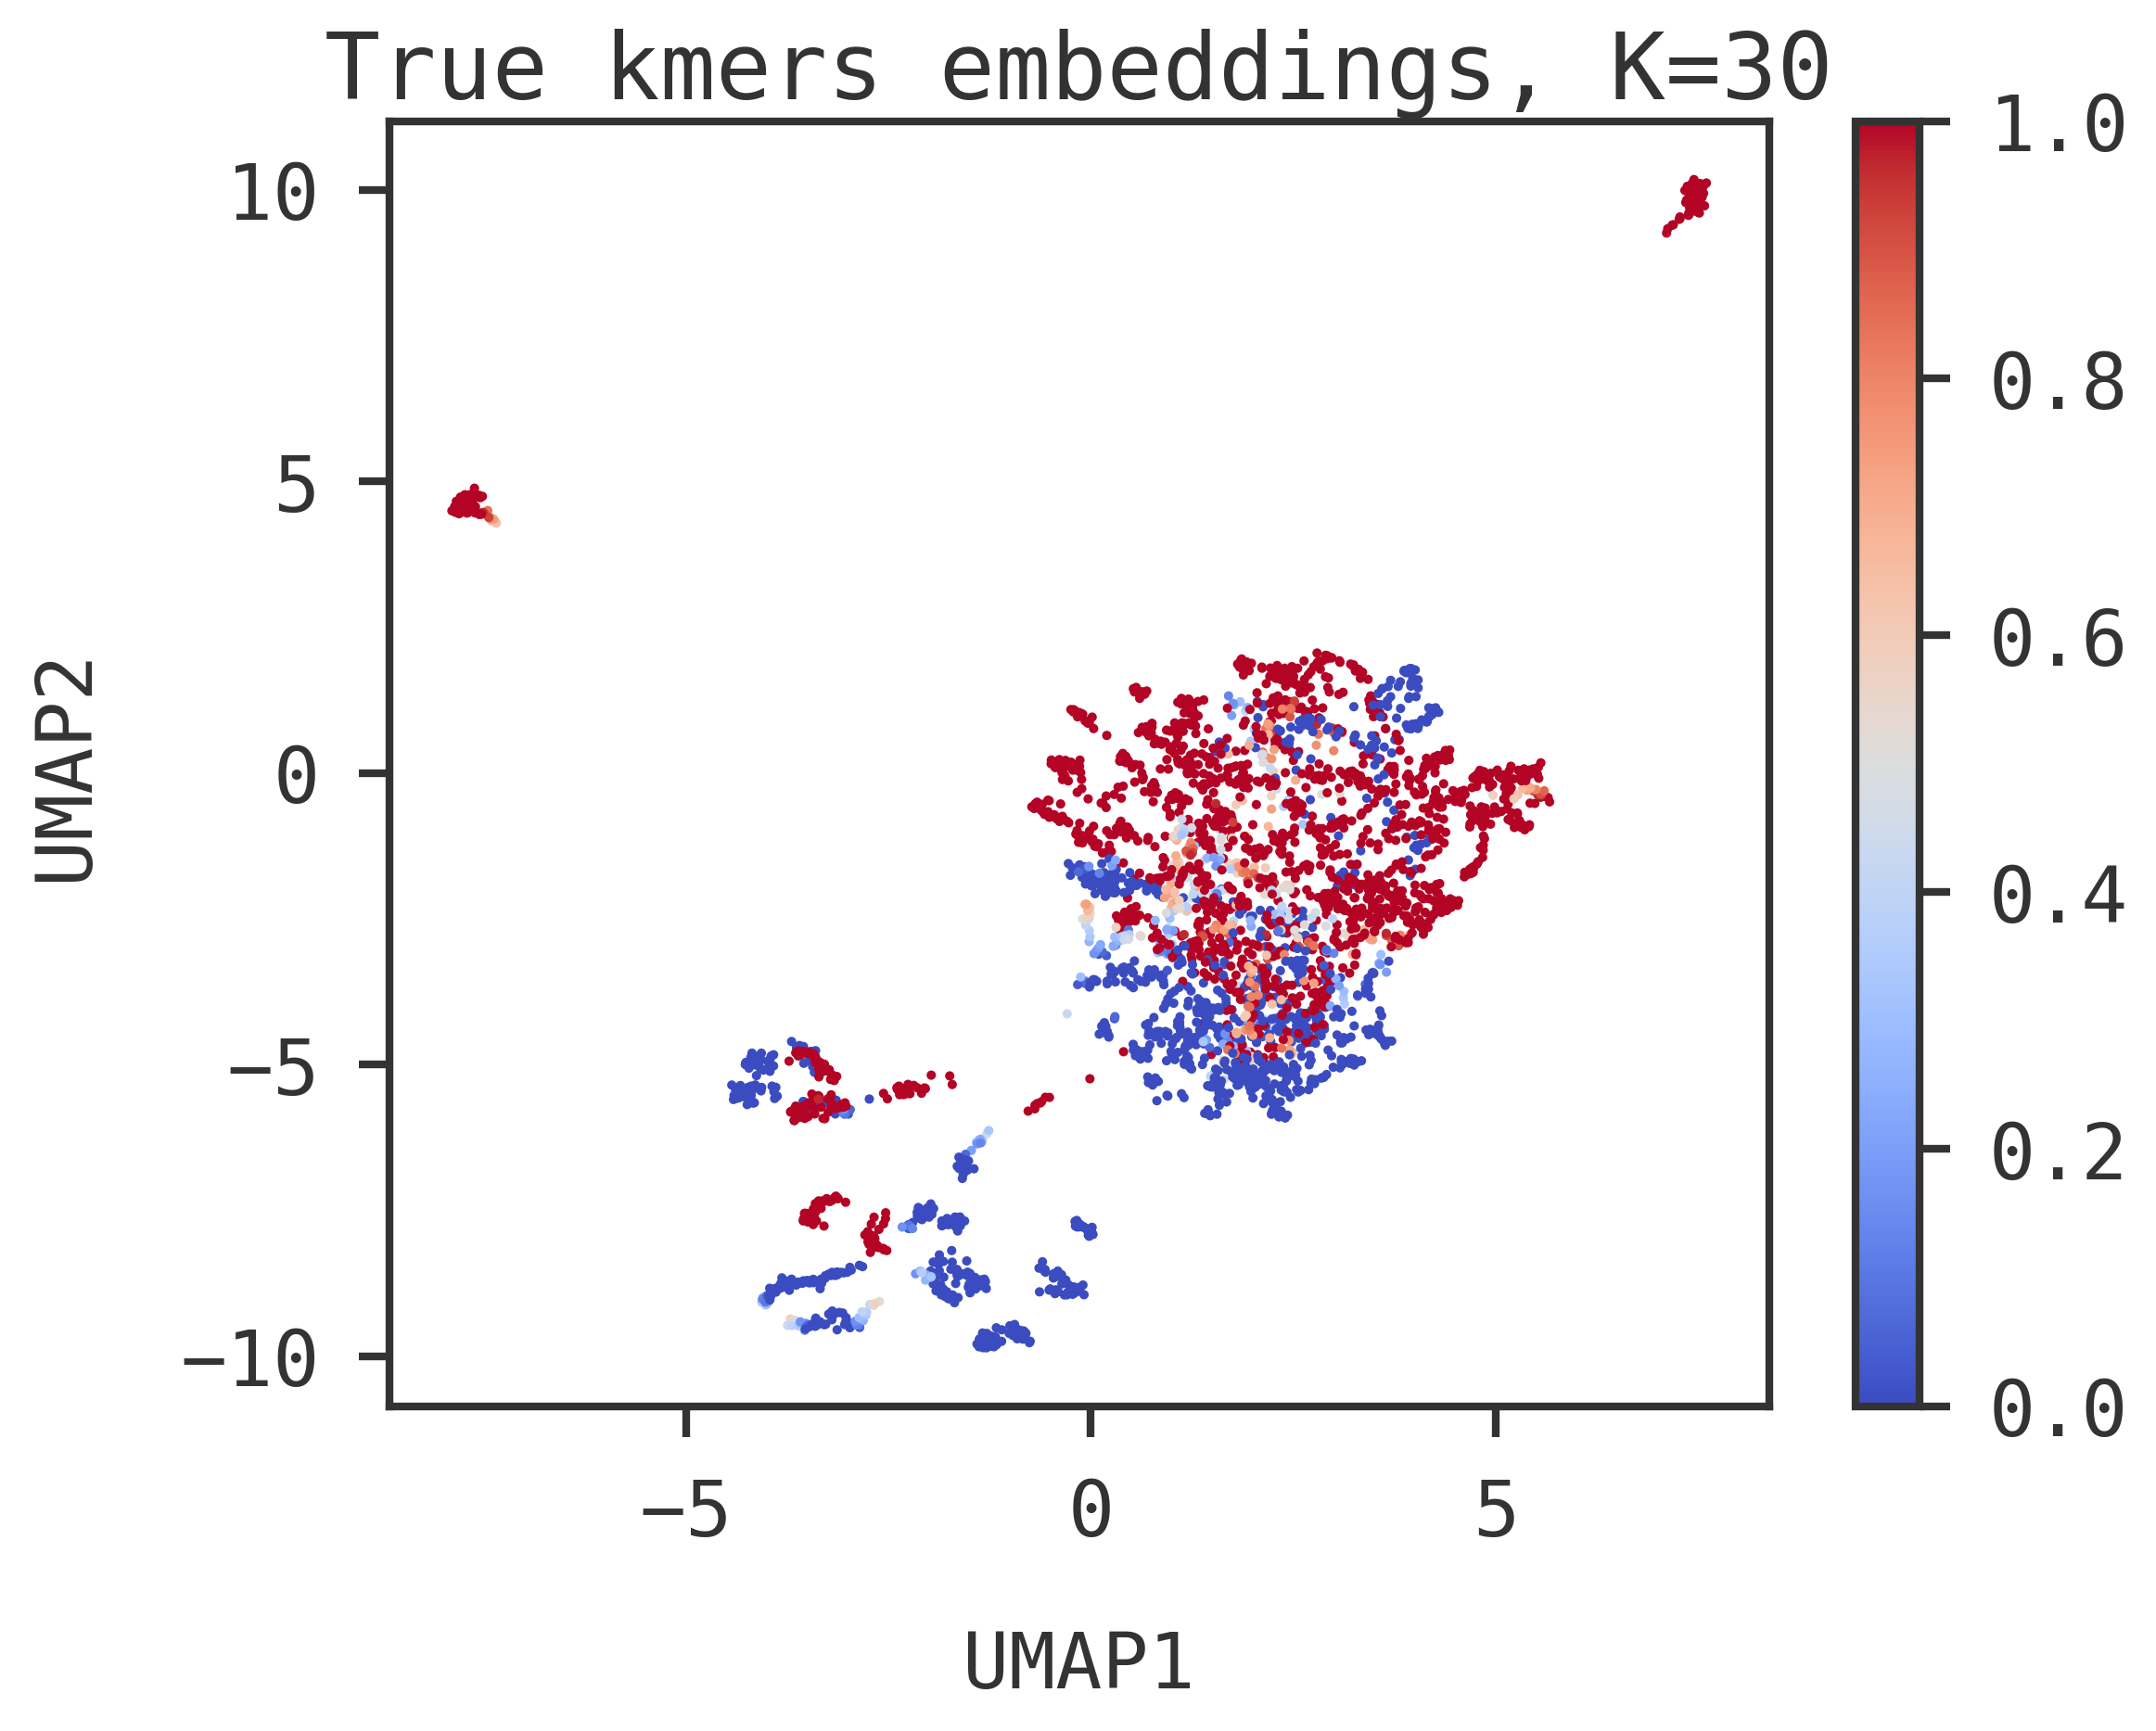

In [10]:

fig = plt.figure(figsize=(8,6))
ax1  = fig.add_subplot(111)

x = umap_kmer_embedding[:,0]
y = umap_kmer_embedding[:,1]

cmap = plt.get_cmap("coolwarm")
sc = ax1.scatter(x, y, s=2, c=kmer_disorder_contents, cmap=cmap)
ax1.set_xlabel("UMAP1")
ax1.set_ylabel("UMAP2")
ax1.set_title(f"True kmers embeddings, K={K}")
plt.colorbar(sc, ax=ax1)
# plt.savefig(f"plots/embedded_kmers_k{K}.png", bbox_inches='tight')
plt.show()

In [11]:
prot_colors = []
for i,l in enumerate(kdict[K]['n_kmers']):
    prot_colors = prot_colors + list(np.repeat(i/len(kdict[K]['n_kmers']), l))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


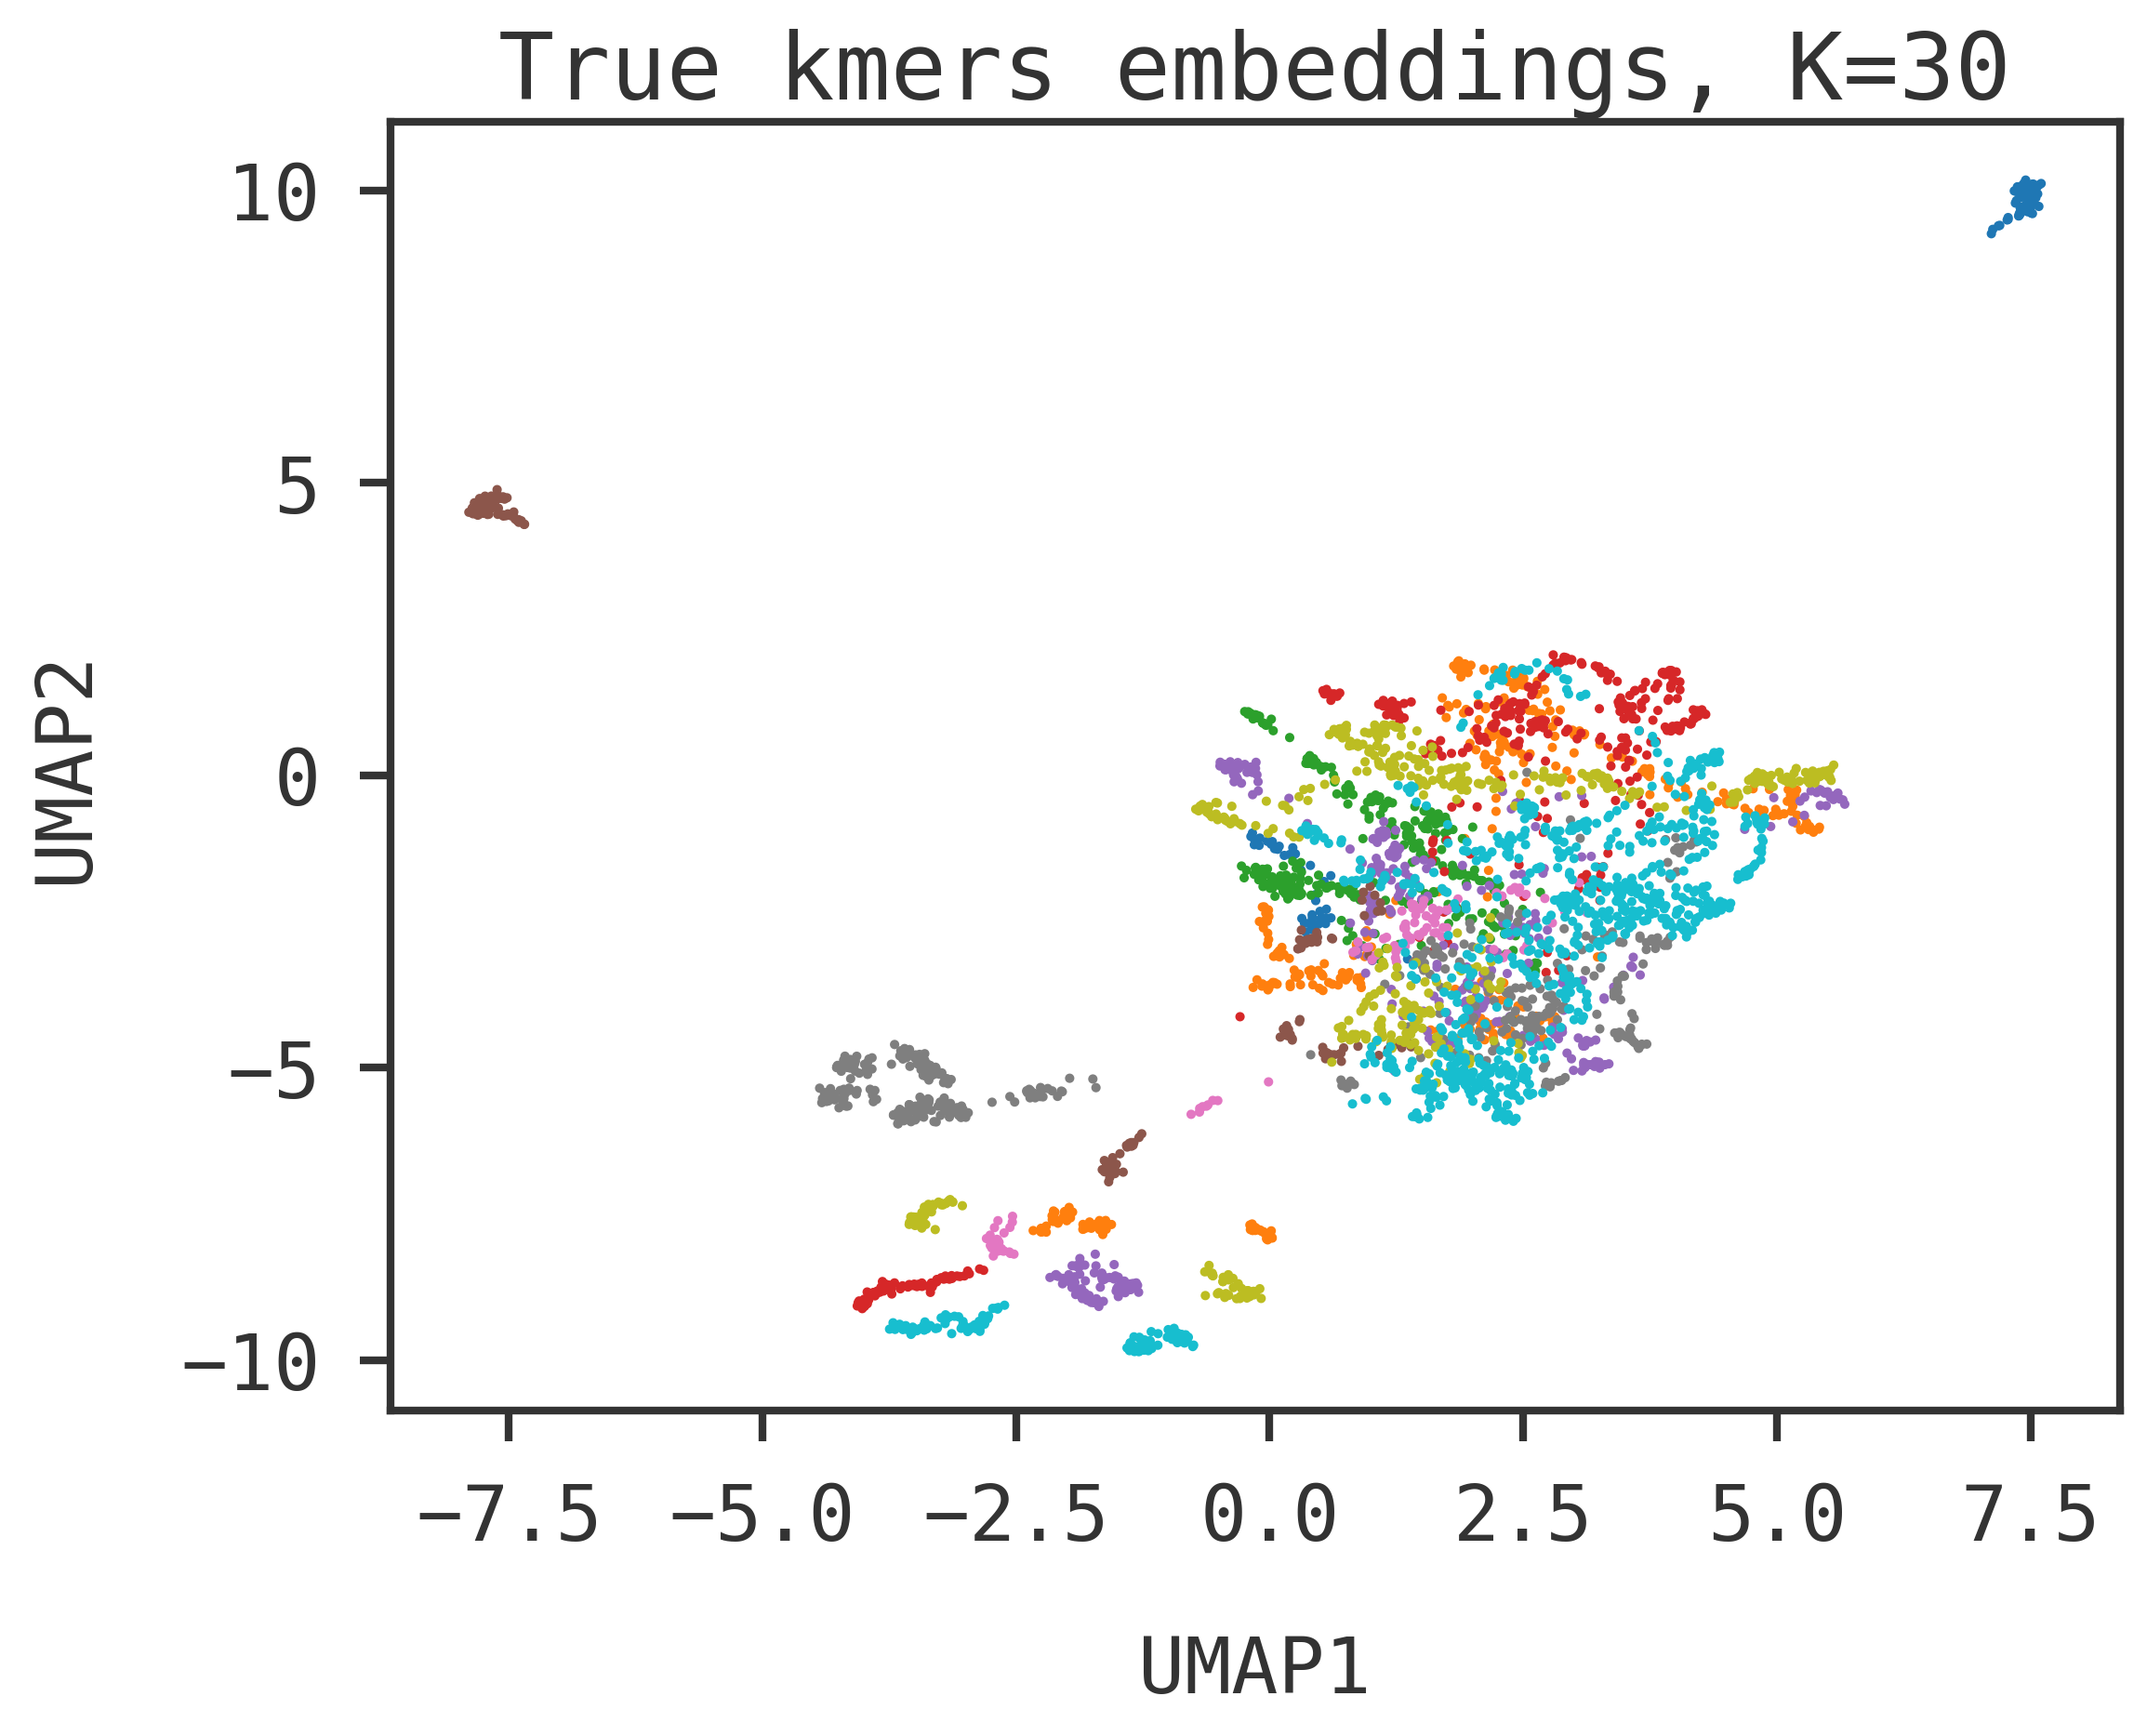

In [12]:

fig = plt.figure(figsize=(8,6))
ax1  = fig.add_subplot(111)

x = umap_kmer_embedding[:,0]
y = umap_kmer_embedding[:,1]

cmap = plt.get_cmap("tab10")
sc = ax1.scatter(x, y, s=2, c=prot_colors, cmap=cmap)
ax1.set_xlabel("UMAP1")
ax1.set_ylabel("UMAP2")
ax1.set_title(f"True kmers embeddings, K={K}")
ax1.legend()
# plt.savefig(f"plots/embedded_kmers_k{K}_byprot.png", bbox_inches='tight')
plt.show()